# Load and preprocess time series data files

In [2]:
path = '../../../data/FRED/CORESTICKM159SFRBATL.csv'

## Load data from CSV

### Having datetime column

In [5]:
import pandas as pd
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [4]:
import pandas as pd
df = pd.read_csv(path)
df


,observation_date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
...,...,...
685,2025-02-01,3.516515
686,2025-03-01,3.257815


In [ ]:
df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   observation_date      687 non-null    object 
 1   CORESTICKM159SFRBATL  687 non-null    float64
dtypes: float64(1), object(1)
memory usage: 50.4 KB


In [ ]:
# Vemos que observation_date tiene dtype object (y necesitamos que sea una fecha)

# df.observation_date
df['observation_date']


0      1968-01-01
1      1968-02-01
          ...    
685    2025-02-01
686    2025-03-01
Name: observation_date, Length: 687, dtype: object

In [9]:
# Si no convierto la columna observation_date en una fecha, no puedo utilizar el accesor .dt para por ejemplo agrupar por Trimestres (quarters)

df.observation_date.dt.to_period('Q')


AttributeError: Can only use .dt accessor with datetimelike values

In [11]:
pd.to_datetime?

Signature:
pd.to_datetime(
    arg: 'DatetimeScalarOrArrayConvertible | DictConvertible',
    errors: 'DateTimeErrorChoices' = 'raise',
    dayfirst: 'bool' = False,
    yearfirst: 'bool' = False,
    utc: 'bool' = False,
    format: 'str | None' = None,
    exact: 'bool | lib.NoDefault' = <no_default>,
    unit: 'str | None' = None,
    infer_datetime_format: 'lib.NoDefault | bool' = <no_default>,
    origin: 'str' = 'unix',
    cache: 'bool' = True,
) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
Docstring:
Convert argument to datetime.

This function converts a scalar, array-like, :class:`Series` or
:class:`DataFrame`/dict-like to a pandas datetime object.

Parameters
----------
arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
    The object to convert to a datetime. If a :class:`DataFrame` is provided, the
    method expects minimally the following columns: :const:`"year"`,
    :const:`"month"`, :const:`"day"`. The column "year"
 

In [12]:
# Entonces primero convierto en fecha

# df.observation_date = pd.to_datetime(df.observation_date)
df['observation_date'] = pd.to_datetime(df['observation_date'])

# df.observation_date
df['observation_date']


0     1968-01-01
1     1968-02-01
         ...    
685   2025-02-01
686   2025-03-01
Name: observation_date, Length: 687, dtype: datetime64[ns]

In [16]:
# df.observation_date.dt.to_period('Q')
df['observation_date'].dt.to_period('Q')


0      1968Q1
1      1968Q1
        ...  
685    2025Q1
686    2025Q1
Name: observation_date, Length: 687, dtype: period[Q-DEC]

In [17]:
# Una manera alternativa de asegurar que las columnas de fechas se interpreten como tales, es que al momento de usar pd.read_csv() se utilice el parámetro parse_dates:

df = pd.read_csv(path, parse_dates=['observation_date'])

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   observation_date      687 non-null    datetime64[ns]
 1   CORESTICKM159SFRBATL  687 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.9 KB


In [19]:
df


,observation_date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
...,...,...
685,2025-02-01,3.516515
686,2025-03-01,3.257815


In [21]:
# df.observation_date
df['observation_date']


0     1968-01-01
1     1968-02-01
         ...    
685   2025-02-01
686   2025-03-01
Name: observation_date, Length: 687, dtype: datetime64[ns]

### Having no datetime column

In [24]:
path = '../../../data/EIA/demand_cal_historical_datetime-split.csv'

In [26]:
df = pd.read_csv(path)
df


,year,month,day,hour,value
0,2019,1,1,0,28487
1,2019,1,1,1,30507
...,...,...,...,...,...
55090,2025,4,14,10,24600
55091,2025,4,14,11,22598


In [31]:
df[['year', 'month', 'day', 'hour']]


,year,month,day,hour
0,2019,1,1,0
1,2019,1,1,1
...,...,...,...,...
55090,2025,4,14,10
55091,2025,4,14,11


In [33]:
pd.to_datetime(df[['year', 'month', 'day', 'hour']])


0       2019-01-01 00:00:00
1       2019-01-01 01:00:00
                ...        
55090   2025-04-14 10:00:00
55091   2025-04-14 11:00:00
Length: 55092, dtype: datetime64[ns]

In [34]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df


,year,month,day,hour,value,datetime
0,2019,1,1,0,28487,2019-01-01 00:00:00
1,2019,1,1,1,30507,2019-01-01 01:00:00
...,...,...,...,...,...,...
55090,2025,4,14,10,24600,2025-04-14 10:00:00
55091,2025,4,14,11,22598,2025-04-14 11:00:00


## Temporal column to index

In [36]:
# df.datetime
df['datetime']


0       2019-01-01 00:00:00
1       2019-01-01 01:00:00
                ...        
55090   2025-04-14 10:00:00
55091   2025-04-14 11:00:00
Name: datetime, Length: 55092, dtype: datetime64[ns]

In [15]:
df.datetime.dt.to_period('Q')

0        2019Q1
1        2019Q1
          ...  
55090    2025Q2
55091    2025Q2
Name: datetime, Length: 55092, dtype: period[Q-DEC]

In [ ]:
# Hasta este punto tengo que usar el accesor .dt

df['datetime'].dt.to_period('Q')


0        2019Q1
1        2019Q1
          ...  
55090    2025Q2
55091    2025Q2
Name: datetime, Length: 55092, dtype: period[Q-DEC]

In [41]:
# Para evitar usar el accesor .dt convierto la columna datetime en el index del DataFrame

df_idx = df.set_index('datetime')
df_idx


,year,month,day,hour,value
datetime,,,,,
2019-01-01 00:00:00,2019,1,1,0,28487
2019-01-01 01:00:00,2019,1,1,1,30507
...,...,...,...,...,...
2025-04-14 10:00:00,2025,4,14,10,24600
2025-04-14 11:00:00,2025,4,14,11,22598


In [42]:
# Accedo al index, que es la que tiene los datos de datetime

df_idx.index


DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2025-04-14 02:00:00', '2025-04-14 03:00:00',
               '2025-04-14 04:00:00', '2025-04-14 05:00:00',
               '2025-04-14 06:00:00', '2025-04-14 07:00:00',
               '2025-04-14 08:00:00', '2025-04-14 09:00:00',
               '2025-04-14 10:00:00', '2025-04-14 11:00:00'],
              dtype='datetime64[ns]', name='datetime', length=55092, freq=None)

In [43]:
# Ahora puedo aplicar to_period directamente, sin utilizar el accesor .dt

df_idx.index.to_period('Q')


PeriodIndex(['2019Q1', '2019Q1', '2019Q1', '2019Q1', '2019Q1', '2019Q1',
             '2019Q1', '2019Q1', '2019Q1', '2019Q1',
             ...
             '2025Q2', '2025Q2', '2025Q2', '2025Q2', '2025Q2', '2025Q2',
             '2025Q2', '2025Q2', '2025Q2', '2025Q2'],
            dtype='period[Q-DEC]', name='datetime', length=55092)

In [44]:
df_idx


,year,month,day,hour,value
datetime,,,,,
2019-01-01 00:00:00,2019,1,1,0,28487
2019-01-01 01:00:00,2019,1,1,1,30507
...,...,...,...,...,...
2025-04-14 10:00:00,2025,4,14,10,24600
2025-04-14 11:00:00,2025,4,14,11,22598


In [49]:
# If i want to see a chart of the total by quarter start (QS)

df_idx.resample('QS').value.sum()


datetime
2019-01-01    57714602
2019-04-01    62958899
                ...   
2025-01-01    60886222
2025-04-01     8956588
Freq: QS-JAN, Name: value, Length: 26, dtype: int64

In [73]:
# Set dark background style for the charts

import matplotlib.pyplot as plt
plt.style.use('dark_background')


<Axes: xlabel='datetime'>

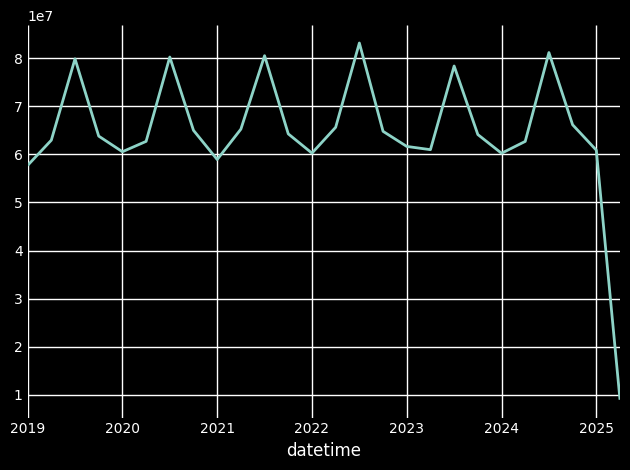

In [74]:
df_idx.resample('QS').value.sum().plot.line()


<Axes: xlabel='datetime'>

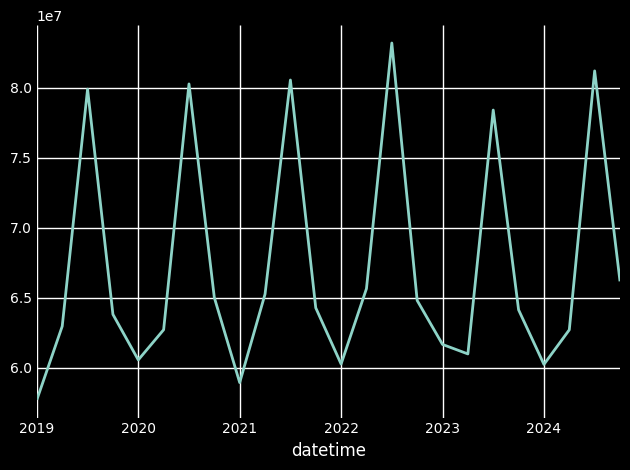

In [75]:
# Mismo gráfico de la celda anterior, pero limitando las fechas hasta 2024 inclusive solamente

df_idx.loc[:'2024'].resample('QS').value.sum().plot.line()


/tmp/ipykernel_4690/1923741840.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_idx.resample('Q').sum().plot.line()


<Axes: xlabel='datetime'>

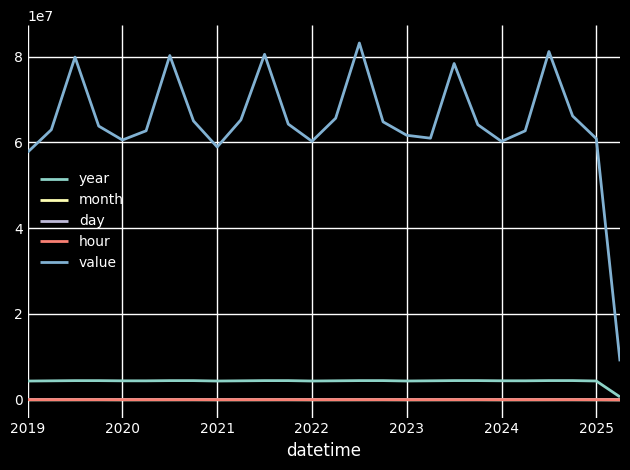

In [76]:
df_idx.resample('Q').sum().plot.line()

/tmp/ipykernel_4690/807899416.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_idx.loc[:'2024'].resample('Q').sum().plot.line()


<Axes: xlabel='datetime'>

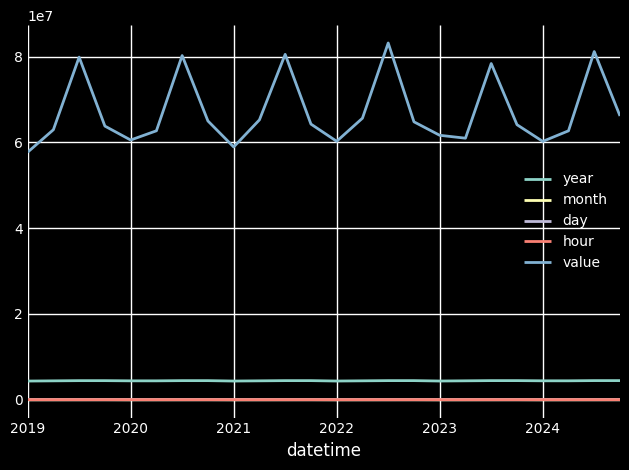

In [77]:
df_idx.loc[:'2024'].resample('Q').sum().plot.line()

## Load data from Excel

In [80]:
path = '../../../data/FRED/CORESTICKM159SFRBATL.xlsx'

In [ ]:
pd.read_excel(path, sheet_name=1)       # la hoja del excel se puede seleccionar por nombre o por número (el 1 es la segunda hoja)

,observation_date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
...,...,...
685,2025-02-01,3.516515
686,2025-03-01,3.257815


In [83]:
pd.read_excel(path, sheet_name=1)

,observation_date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
...,...,...
685,2025-02-01,3.516515
686,2025-03-01,3.257815


In [86]:
df = pd.read_excel(path, sheet_name=1, index_col='observation_date')
df


,CORESTICKM159SFRBATL
observation_date,
1968-01-01,3.651861
1968-02-01,3.673819
...,...
2025-02-01,3.516515
2025-03-01,3.257815


In [88]:
# Verificamos que al hacer df.index nos devuelva un objeto DatetimeIndex

df.index


DatetimeIndex(['1968-01-01', '1968-02-01', '1968-03-01', '1968-04-01',
               '1968-05-01', '1968-06-01', '1968-07-01', '1968-08-01',
               '1968-09-01', '1968-10-01',
               ...
               '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01',
               '2024-10-01', '2024-11-01', '2024-12-01', '2025-01-01',
               '2025-02-01', '2025-03-01'],
              dtype='datetime64[ns]', name='observation_date', length=687, freq=None)

In [17]:
df = pd.read_excel(path, sheet_name=1)

df

,observation_date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
...,...,...
685,2025-02-01,3.516515
686,2025-03-01,3.257815


In [18]:
df.observation_date

0     1968-01-01
1     1968-02-01
         ...    
685   2025-02-01
686   2025-03-01
Name: observation_date, Length: 687, dtype: datetime64[ns]

In [19]:
df = pd.read_excel(path, sheet_name=1, parse_dates=True, index_col=0)

df

,CORESTICKM159SFRBATL
observation_date,
1968-01-01,3.651861
1968-02-01,3.673819
...,...
2025-02-01,3.516515
2025-03-01,3.257815
